# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
#renaming some columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KG',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

#get rid of all rows without info on grade 4 math scores
df.dropna(subset = ['AVG_MATH_4_SCORE'], inplace = True)

#filling in some info where possible
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [4]:
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
mich_avg = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()
ohio_avg = df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()
if mich_avg > ohio_avg:
    print("Michigan")
else:
    print("Ohio")

Ohio


Find the average for your outcome score across all states in 2019

In [6]:
df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
#to see how different kinds of expenditures effect things
df["TOTAL_EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"]/df["ENROLL_ALL"]
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"]/df["ENROLL_ALL"]
df["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"] = df["SUPPORT_SERVICES_EXPENDITURE"]/df["ENROLL_ALL"]
df["CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT"] = df["CAPITAL_OUTLAY_EXPENDITURE"]/df["ENROLL_ALL"]

Feature engineering justification: 

*'Other Expenditure' is a bit vague, so it would be difficult to draw very thorough conclusions from it. However, the rest are specific enough that they could help inform about what kinds of expenditures are at least correlated (historically) with students' scores.*

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

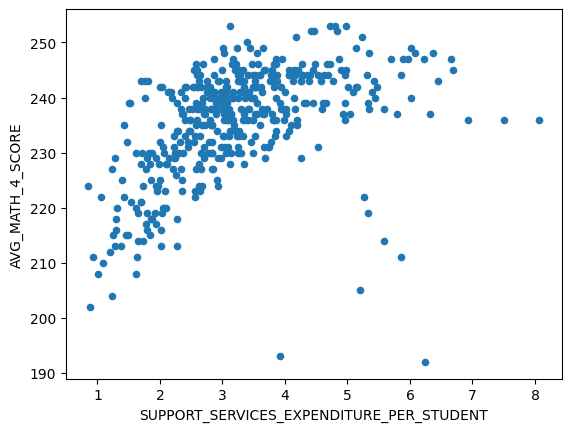

In [9]:
df.plot.scatter(x = "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", y = "AVG_MATH_4_SCORE")

**Average Grade 4 Math Scores Compared to Per-Student Support Services Expenditures**

**Visualization 2**

<Axes: xlabel='INSTRUCTION_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

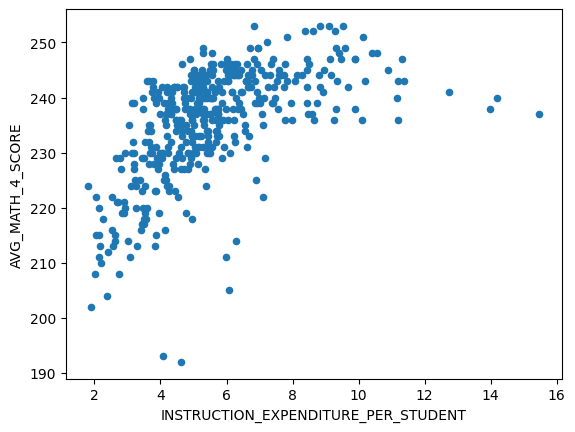

In [25]:
df.plot.scatter(x = "INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "AVG_MATH_4_SCORE")

**Average Grade 4 Math Scores Compared to Per-STudent Instruction Expenditures**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[["INSTRUCTION_EXPENDITURE_PER_STUDENT", "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", "CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT"]].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [17]:
# import your sklearn class here
#from sklearn.kernel_ridge import KernelRidge
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [18]:
# create your model here
model = LogisticRegression(random_state = 16, max_iter=4000)

In [19]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=4000, random_state=16)

In [20]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [21]:
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)

1.5795454545454546

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

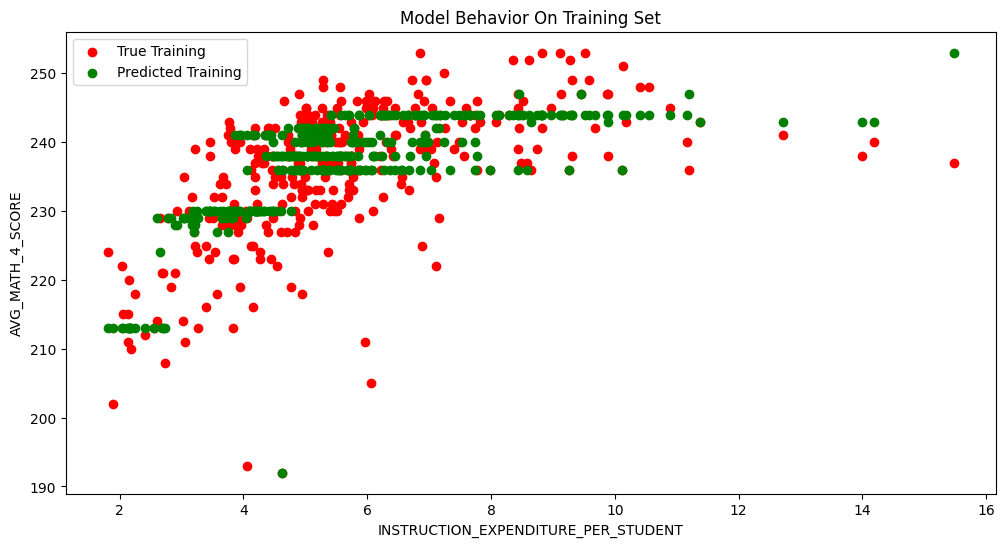

In [24]:
col_name = "INSTRUCTION_EXPENDITURE_PER_STUDENT"

f = mp.figure(figsize=(12,6))
mp.scatter(X_train[col_name], y_train, color = "red")
mp.scatter(X_train[col_name], model.predict(X_train), color = "green")

mp.legend(['True Training','Predicted Training'])
mp.xlabel(col_name)
mp.ylabel("AVG_MATH_4_SCORE")
mp.title("Model Behavior On Training Set")

In [23]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**There is a generally positive correlation between per-student expenditures and average grade 4 math scores, but this appears to only be true to a limited extent - the graphs show a mostly logarithmic pattern. Interestingly, this appears to be true across different kinds of spending. This suggests there is a point beyond which additional spending is not beneficial, which suggests the virtues of looking into the influences of other factors - perhaps more structural ones (such as students' socioeconomic statuses) - when seeking to maximize student achievement. However, this data does also suggest that areas with very low per-student expenditures should be able to experience growth in students' scores by devoting more funding towards their educational system.**